<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Statistical Normality Tests

## Tests for Categorical Data

So far, we have been investigating tests for data with continious values. But, many data types are categorical where we work with count statistics. What tests can we apply to these?

### Pearson's Chi-Squared Test

One of the earliest tests for count data was developed by Karl Pearson around 1900. Dispite its age, this test is still used today. The Pearson Chi-squared test (also written as $\chi$-squared) has the following properties:

- It is an unpaired test for counts in different categories.
  - These categories must be mutually exclusive. For example, does the patient have cancer? (yes/no)
  - Test if the two categories differ in WBC count.
  - Rolling a die. (1,2,3,4,5,6)
  - Test if the six categories occur the same (fair die).
  - Does a tweet contain a specific word? (yes/no)
  - test if the two categories differ in tweet length or word count.
- Tests if different categories differ in some specific value.
- The Chi-squared statistic depends on the ‘degrees of freedom’ of the test.
  - This is equal to n-1.  Where n equals the number of different categories.
- The test looks at the sum of the outcome differences from expectations.
- Chi-squared is also used for a ‘goodness of fit’ test. Test if sample is representative of population.
  - Test if your sample has expected make up of categories.
  - For example, if our population is 50-50 men-women, then we test if our sample is different from those expected probabilities.

The density of the $\chi$-squared distribution depends on the degrees of freedom.

![](https://library.startlearninglabs.uw.edu/DATASCI410/img/Chi-square.png)

As with any probability density function, confidence intervals and p-values can be computed. Notice that the $\chi$-squared distribution becomes flatter and with greater dispursion as the degrees of freedom increase. In practice, this means that you will need large samples to get a meaningful result if you have too many choices in your test. 

### Karl Pearson

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Karl_Pearson_1912.jpg" title="Karl Pearson in 1912: A scary looking stats professor." alt="Pearson 1912" style="float: left; height: 200px; margin-right: 10px;" />
Karl Pearson was the dean of late 19th and early 20th century mathematical statisticians. Pearson was a student of Frances Gaulton, the inventor of the regression method. Willam Sealy Gossett was one of Pearsons's students. This realationship is said to be the insparation for Gossett's pseudonym 'Student'. 


In many ways Pearson's infuluence on the mathematical foundations of statistics is still with us more than a century latter. Most unfortunately, Pearson was also a eugenicist and a raceist. His misuse of statistics in this area tarnished his legacy.

### Building a Chi-squared table

The traditional way to apply a Chi-squared test is to first create a Chi-squared table. In this example we are looking the results of an A-B test with three possible outcomes. For example, this type of test might be applied to determine if a new web site drives more customer purchases. 

the code in the cell below builds a simple Chi-squared table. The columns in the data frame are:

- The actual occurance of events.
- The expected probability of these events. This is the distribution of the null hypothesis.
- The expected occurance of events given the expected probabilities.
- The difference between the occurance and the expected number of events.
- The square of the difference.
- The squared difference normalized by the expected number of occurances. The sum of these figures in the Chi-squared statistic. 

Execute the code and examine the results. 

In [2]:
import pandas as pd
import numpy as np
ab_data = pd.DataFrame({'Action':['Leave Page', 'Continue Purchase', 'Add More to Purchase'],
                       'occurrence':[55,43,22],
                       'expected_per':[0.6,0.3,0.1]})
sum_occurrence = ab_data.loc[:, 'occurrence'].sum()
ab_data.loc[:, 'expected_occurance'] = sum_occurrence * ab_data.loc[:, 'expected_per']
ab_data.loc[:, 'diff'] = ab_data.loc[:, 'occurrence'] - ab_data.loc[:, 'expected_occurance'] 
ab_data.loc[:, 'sqr_diff'] = ab_data.loc[:, 'diff'].apply(lambda x: x**2)
ab_data.loc[:, 'diff_expect'] = ab_data.loc[:, 'sqr_diff'].div(ab_data.loc[:, 'expected_occurance'], axis='index')
ab_data = ab_data.append({'Action': 'Totals',
                      'occurrence': sum_occurrence,
                       'expected_per':  [np.nan],
                      'expected_occurance': [np.nan],
                      'diff': [np.nan],
                      'sqr_diff': [np.nan],
                      'diff_expect': ab_data.loc[:, 'diff_expect'].sum()}, 
                        ignore_index =  True)
ab_data = ab_data[['Action', 'occurrence', 'expected_per', 'expected_occurance', 'diff', 'sqr_diff', 'diff_expect']]
ab_data                                       

,Action,occurrence,expected_per,expected_occurance,diff,sqr_diff,diff_expect
0,Leave Page,55,0.6,72,-17,289,4.013889
1,Continue Purchase,43,0.3,36,7,49,1.361111
2,Add More to Purchase,22,0.1,12,10,100,8.333333
3,Totals,120,[nan],[nan],[nan],[nan],13.708333


This Chi-squared table is interpreted as follows:

- The $\chi$-squared test statistic is 13.708, which is computed as the sum of the squared differences normalized by the expected occurances.
- The $\chi$-squared distribution has (3 Outcomes - 1) = 2 degrees of freedom.
- Degree of freedom is the number of outcome options (3) minus 1.

Run the  code in the cell below to compute the p-value of the chi-squared test with the `scipy.stats.chi2.cdf` function.

chi2.pdf(x, df, loc, scale)
- x = chi squared test stat
- df = degrees of freedom
- loc = center around a mean
- scale = scale to std dev

To calculate the p-value, remember: 
**Probability Density Function** tells you how dense the probability is at a given point. 

**Cumulative Distribution Function** this is the mass of probability of the function up to a given point; what percentage of the distribution lies on one side of this point?

So we can take 1-CDF to give us PDF, and get our pvalue: 

In [9]:
import scipy.stats as ss

# p = 1 - chi2 cdf
1 - ss.chi2.cdf(13.7, df = 2)

0.0010594556929076626

This p-value is rather small. Evidently, its very unlikely that the differences we see are from chance alone and we should reject the null hypothesis. 

In the foregoing example we computed the Chi-squareed statistic and p-value directly. In general, this is a somewhat cumbersom approach. Instead, we can use the `chisquare` function from the `scipy.stats` package as shown in the code below. Execute this code and examine the results. 

In [15]:
# provide observed and expected columns
chisq, pvalue = ss.chisquare(ab_data.loc[:, 'occurrence'][:3], 
             ab_data.loc[:, 'expected_occurance'][:3])
print('Chi Squared statistic = ' + str(chisq))
print('P=value = ' + str(pvalue))

Chi Squared statistic = 13.708333333333334
P=value = 0.0010550504780913119


The difference between the expected and observed number of occurances is significant. The large Chi-squared value on 2 degrees of freedom and the small p-value indicate we can reject the null hypothesis that the observed occurances follow the same distribution as the expected occurances. There is a low chance that this difference occurs from random variation alone. 

Finally, we should check the power of our test. Execute the code in the cell below and examine the results. In this case, we will use the `power_divergence` function from the `scipy.stats` package. Execute this code to determine if this test has reasonable power.

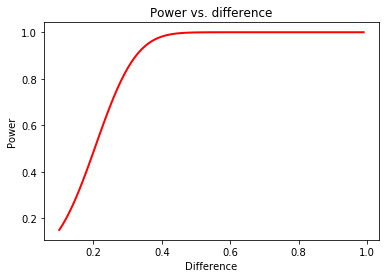

In [21]:
import statsmodels.stats.power as ssp
diffs = np.arange(start = 0.1, stop = 1.0, step = 0.01) 
powers = ssp.GofChisquarePower().solve_power(effect_size = diffs, nobs=120, n_bins = 3, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

Apparently, this test is quite powerful, and we could have detected much smaller differencecs between the observed and expected counts. 

## Your Turn 1
As you have observed, the test is quite powerful with 120 observations. But, what if we do not have a smaple this large. Compute and plot the power of the Chi-squared test for an effect size of 1.0 at sample sizes in the range $\{ 10, 100\}$. The `nobs` argument to the `GofChisquarePower` is the sample size. 

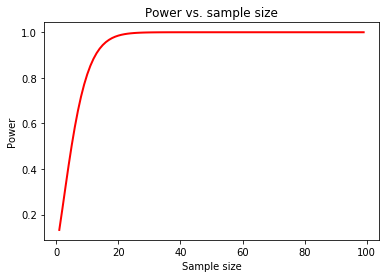

In [22]:
samples = np.arange(start = 1, stop = 100, step = 1.0) 
powers = ssp.GofChisquarePower().solve_power(effect_size = 1.0, nobs = samples, n_bins = 3, alpha=0.05)
plot_power(samples, powers, xlabel = 'Sample size', title = 'Power vs. sample size') 

Examine your results. At a sample size of 30 is the power of the test approximately 1.0? ANS: yes

### Fisher's Exact Test

The assumptions behind the Chi-squared statistic breakdown when the sample size is small (e.g. number of occurances $\le 10$). In this case you can use Fisher's Exact Test. In practice Fisher's exact test is rarely used, but it is interesting  to think about it anyway. 

According to the story, in 1911 Ronald Fisher worked in the same institutioin with a talented aquatic botanist, Dr. Muriel Bristol, who was quite particular about how her tea was served. Dr. Bristol told Fisher that she could tell the difference between cups of tea where the milk had been poured into the cup before or after the tea was poured. 

Fisher, was a bit skeptical. He challenged Dr. Britol to a test. In the test Fisher prepared eight cups of tea. Four of the cups of where prepared in Dr. Bristol's prefered manner and the other four the other way. The tea was prepare out of sight of Dr. Bristol. However, she knew that there were four cups prepared each way. The order of preparation of each cup of tea was randomized. Fisher served the cups of tea to Dr. Bristol and asked her how the tea had been poured. In every case, she was correct!

Fisher devised a **permutation test** to determine the likelihood that Dr Bristol could have simiply guessed the correct outcome. He devised the following permuation table for the chances of success:

![](https://library.startlearninglabs.uw.edu/DATASCI410/img/tea.png)

The possible permuations of possible ways that Dr Bristol could have correctly (sucess) or incorrectly identified the way each cup of tea was prepared:

$$\frac{8!}{4!(8-4)!} = 70$$

So, the chance that the Dr Bristol could purely guess (by random chance) the outcome is only 1 in 70 or about 1.4%. 

Let's try an example of Fisher's exact test. Take a simple 2X2 matrix of counts. The counts are number of success and failures for two samples (two sets of Bernoulli trails), on the number of sharks observed in two oceans overe some period of time. Run the code in the cell below to apply the Fisher exact test to these counts.  

In [23]:
mat_test = pd.DataFrame(np.array([[8,2],[1,5]]),
                       index = ['wales', 'sharks'],
                       columns = ['Atlantic', 'Indian'])
print(mat_test)
oddsratio, pvalue = ss.fisher_exact(mat_test)
print('\nOddsratio = ' + str(oddsratio))
print('P-value = ' + str(pvalue))

        Atlantic  Indian
wales          8       2
sharks         1       5

Oddsratio = 20.0
P-value = 0.03496503496503495


In this case, we can reject the null hypothesis. Evidently the difference of counts of wales and sharks in the two oceans from this experiment is unlikely to arrise by chance alone. 

## Testing distributions

Test statistics, and other statistics, often make distribution assumptions. This raises the question, how can we test a distribution assumption. To answer this question we will now look at both graphical and  formal tests. Since in most cases, distribution assumptions are approximate, simple graphical methods are often sufficient.   

### An example with Q-Q plot

The qualtile-quantile (Q-Q) plot provides a handy visual means to inspect the similarity of distributions of a data set. The general idea is to plot the quantiles of the sample on the vertical axis and the quantiles of the thoretical distribution on the horizontal axis. If the points of the plot fall on an approximately straight line, you can conclude that the sample distribution is close to the thoretical. 

The Normal Q-Q plot, plots the quantiles of a standard Normal distribution on the horizontal axis and the quantiles of the data sample on the vertical axis. If the sample is Normal the data points will fall in a straight line. 

Execute the code in the cell below to compute two samples from a Normal distribution.

In [24]:
import numpy.random as nr
nr.seed(1357)
norm1 = nr.normal(size = 100).tolist()
norm2 = nr.normal(size = 100).tolist()

Run the code in the cell below to create Q-Q plots of the two samples, and examine the results.

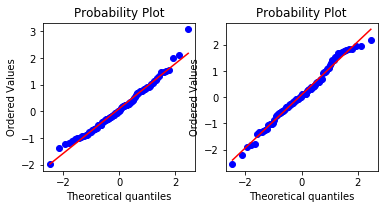

In [25]:
def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2)    

The line of points on both Q-Q plots is close to straight, showing the not suprising result given that both samples are realizations of Normal distributions.

You can also test if two samples have similar distributions using the same plot. Run the code in the cell below and examine the result. 

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x = sorted(norm1), y = sorted(norm2))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

NameError: name 'norm1' is not defined

Again, not suprisingly, the points line close to a straight line. The noticeable deviations are a result of the small sample size. 

### The Kolmogorov-Smirnov test for distributions

The Kolmogorov-Smirnov test is a general test of the distribution of a sample. The K-S statistic is just the maximum vertical distance between CDF of the sample and the CDF of the theortical distribution. Since it is based on a simple deviatiion the K-S test can test departure from any hypothetical distribution, not just normal. As you should expect, the trade-off for this generality is that the K-S test does not have particularly high power. There are numerious distribution-specific tests with greater power, but will will not discuss those in this lesson. 

As a first step in investigating the Kolmogorov-Smirnov test plot the cumulative distribution functions of the two samples by executing the code in the cell below.

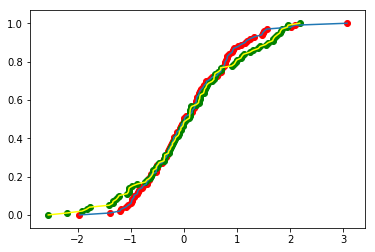

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

plot_cums(norm1, norm2)    

Notice that, as you might expect, the two cumulative density function are quite similar. Even with data sampled from the same theoritical distribution, you can see there is deviation between the cumulative distribution functions. The question is, are these deviations significant? 

The **K-S statistic is the maximum vertical difference** between the two cumulative density functions. Based on this distance and the number of samples, the p-value for the K-S test is computed.  

Next, let's look at the affect of normalization or standardization of the samples for the K-S test.  It is important that the **samples must be standardized** before applying the Kolmogorov-Smirnov test. Execute the code in the cell below to compute and plot the cumulative density function of Normal distibutions with different location (mean) and scale (standard deviation) parameters.

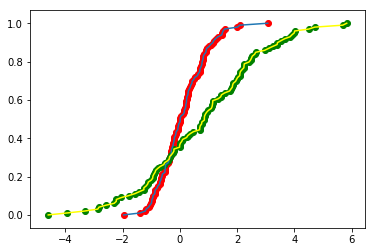

In [28]:
nr.seed(155)
norm3 = nr.normal(loc = 1, scale = 2.0, size = 100).tolist()
plot_cums(norm1, norm3)   

Examine the plot. You can see that there are significant deviations between the two cumulative distribution functions. This result indicates that the two samples are drawn from different distributions. 

Now, execute the code in the cell below to standardize (zero mean, unit standard deviation) the two samples and plot the cumulative distribution function. 

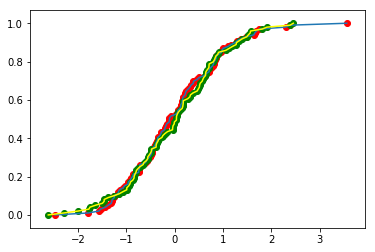

In [29]:
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm3_s = scale(norm3)
plot_cums(norm1_s, norm3_s)  

Notice that the cumulative density plots of the standardized data are quite similar. This indicates the two samples are drawn from the same distribution. 

Next, you will compute the **K-S statistic, maximum vertical distance between the two cumulative density functions**, and the **p-value or probability that this difference arrises from chance alone**. The code below uses the `kstest` function from the `scipy.stats` package. Execute this code. 

In [30]:
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
ks_test(norm1_s)    

KS-statistic = 0.055333681640335475
P-value = 0.9194262643201715


The K-S statistic is quite small and the p-value is large. The chance that we cannot reject the null hypothesis since the probability that the difference arrises by chance alone is high. 

Next, let's see how the KS-test works for two quite different distributions, the Normal and Uniform. The code is the cell below computes the KS-statistics to test the Normality of a Uniform distribution. Execute this code and examine the results. Do these results appear as you expect?

In [31]:
unif = nr.uniform(size = 100).tolist()
ks_test(unif) 

KS-statistic = 0.5017201465353041
P-value = 0.0


In this case, the K-S statistic is large and the p-value quite small. We can reject the null hypothesis that these distributions are the same, and the chance of this difference of arrising from random variation alone is quite small.

Now, we and test if the samples drawn from the Uniform distribution are consistent with the theoretical Uniform distribution. Execute the code in the cell below and examine the results. 

In [32]:
ks_test(unif, 'uniform') 

KS-statistic = 0.07177397723793816
P-value = 0.6811936209635046


In this case, we cannot reject the null hypothesis that these disributions are different. The K-S statistic is small and the p-value is large.  

The K-S test is rather general, as it can be applied to test any distribution. However, this means that the **power** of this test is limited. The power of a test is the probability of rejecting a null hypothesis when the alternative is true. 

As is always the case with clasical statistics, a more powerful test can be created by adopting more restrictive assuptions. For example, the Shapiro-Wilk test has greater power, but is specifically for Normal distributions. 

## Testing Multiple Groups and ANOVA

So far, we have only looked at tests for comparing two samples. What if we have multiple groups and we wanted to compare their means? Why can’t we just do multiple two-sample t-tests for all pairs?
- Results in increased probability of accepting a false hypothesis.
- E.g., if we had 7 groups, there would be (7 Choose 2)=21 pairs to test.  If our alpha cutoff is 5%, then we are likely to accept about 1 false hypothesis (approximately 21*0.05).

There is another alternative:

- Null Hypothesis: All groups are samples from the same population.
- Alternative Hypothesis: At least one group has a statistically different mean.

This type of analysis is called “ANalysis Of VAriance”, or ANOVA. ANOVA is one of a large family of models used for **experimental design**.


### Basic ANOVA Theory 

Let's have a look at how we would perform the comparisons between the multiple groups of data. First, make data independence and Normality assumptions about the groups. Then define:

$$ I = number\ of\ treatments\\
n = number\ of\ data\ or\ samples\\
SS = sum\ of\ squares$$

We can calulate the following quantities:

$$SST = SS\ Treatment\\
SSE = SS\ Error\ within\ groups\\
SS- SSTotal = SST + SSE$$

Further, 

$$ DFT = degrees\ of\ freedom\ Treatment\\
DFE = degrees\ of\ freedom\ Error\ within\ groups\\
DFTotal = DFT + DFE = (I-1) + (n-I) = n -1$$

And,

$$MST = mean\ square\ error\ Treatment\\
MSE = mean\ square\ error\ within\ groups$$

Finally we can compute the F ststistic with $I-1$ degrees of freedom:

$$F = \frac{Variance\ between\ treatments}{Variance\ within\ treatments} = \frac{MST}{MSE} =  \frac{\frac{SST}{DFT}}{\frac{SSE}{DFE}}$$

The F statistic on the degrees of freedom determines the significance or p-values of the test. We can lay these results out in an ANOVA table as follows:

|Type|Sum of Squares|df|Mean Square E|F|Significance|
|---|---|---|---|---|---|
|Between Groups|SST|DFT|SST/DFT|F Statistic| p-value|
|Within Groups|SSE|DFE|SSE/DFE|||
|Groups Total|SSTotal|DFTotal||||


### ANOVA Example

Let's start with an example with 4 groups. In Fisher's experimental design terminology we say we have data from 4 **treatments**. Run the code below and examine the difference in the box plots.

Text(0.5,1,'Box plot of variables')

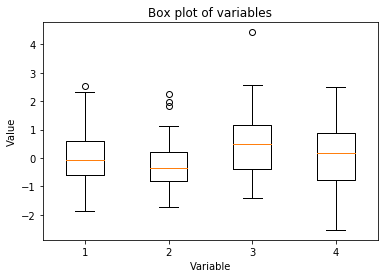

In [33]:
nr.seed(335566)
df1 = nr.normal(size = 50).tolist()
df2 = nr.normal(size = 50).tolist()
df3 = nr.normal(loc = 0.5, size = 60).tolist()
df4 = nr.normal(size = 40).tolist()

import matplotlib.pyplot as plt
plt.boxplot([df1, df2, df3, df4])
plt.ylabel('Value')
plt.xlabel('Variable')
plt.title('Box plot of variables')

The plot shows variation between the distributions of the four variables. The question is, are these differences significant. 

The code in the cell below applies the R `f_oneway` function, from the `scipy.stats` package, to the data. The `f_oneway` function computes an F-Statistic and a p-value. 

The code in the cell below models the anova of the values by groups and prints the results of the model. Run this code and examine the results. 

In [34]:
f_statistic, p_value = ss.f_oneway(df1, df2, df3, df4)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 4.770281688280018
P-value = 0.003120305920760558


The F-Statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 4 variables have the same mean, as the probability of the differences arrising from random chance is quite low. 

There is also the question of the power of this ANOVA test. In other words, what is the probability that we will detect a difference in means? 

The code in the cell below uses the `FTestAnovaPower.solve_power` function from the `statsmodels.stats.power` package. Power is computed for mean differences in the range $\{ 0.1, 1.0 \}$ and ploted against the mean difference. To be conservative, we are using the smallest number of samples for the varibles as the number of observations, `nobs`. Execute this code.

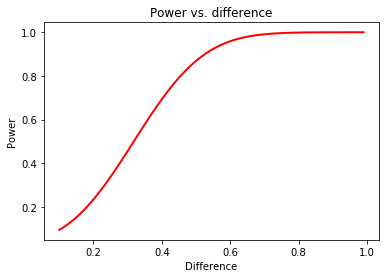

In [35]:
import statsmodels.stats.power as ssp
diffs = np.arange(start = 0.1, stop = 1.0, step = 0.01) 
powers = ssp.FTestAnovaPower().solve_power(effect_size = diffs, nobs=40, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

You can see that even with 40 observations, the probability of detecting a farily small difference in means between the groups is quite high. 

## Your turn 8
In a hypothetical example, after one month on the job, a new manager at an auto dealership observes changes in the average daily total sales by day of the week. She wants to know if these differencesare significant or just from random variation?

To solve the problem you will do the following:
1. Execute the code in the cell provided below to compute some simulated data values by day of the week an display a box plot. The parameters for the Normal distributions for each day of the week are based on the average sales for each day and the standard deviation of sales over the month. 
2. In the next cell compute and display the F-Statistic and p-value for this sample. 
3. Compute the power of this test with the  following parameters:
  - Range of differences from 1.0 to 10 in steps of 0.1. 
  - To display the plot of power vs. dollars, you must scale these differences by 10,000, the scale of the Normal distribution. Do this after you have computed the power values. This process is necessiary since the manager will want to see the results in units she understands, dollars. 

Text(0.5,1,'Box plot by day of week')

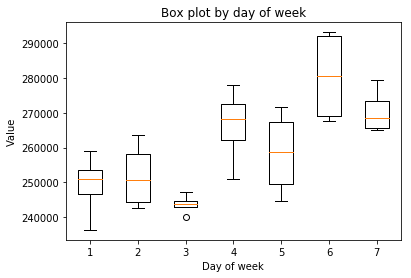

In [36]:
nr.seed(998877)
Mon = nr.normal(250000, scale = 10000, size = 4)
Tue = nr.normal(255000, scale = 10000, size = 4)
Wed = nr.normal(245000, scale = 10000, size = 4)
Thu = nr.normal(260000, scale = 10000, size = 4)
Fri = nr.normal(265000, scale = 10000, size = 4)
Sat = nr.normal(275000, scale = 10000, size = 4)
Sun = nr.normal(270000, scale = 10000, size = 4)

plt.boxplot([Mon, Tue, Wed, Thu, Fri, Sat, Sun])
plt.ylabel('Value')
plt.xlabel('Day of week')
plt.title('Box plot by day of week')

In [37]:
f_statistic, p_value = ss.f_oneway(Mon, Tue, Wed, Thu, Fri, Sat, Sun)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 6.58156739833342
P-value = 0.0005033000997633311


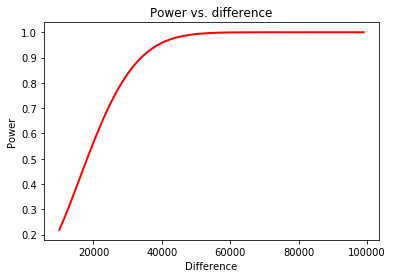

In [38]:
from math import sqrt
diffs = np.arange(start = 1, stop = 10, step = 0.1) 
powers = ssp.FTestAnovaPower().solve_power(effect_size = diffs, nobs=4, alpha=0.05)
plot_power(10000 * diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

#### Examine the results of you analysis and answer the following questions:
1. Is the difference between the sales on the different days statistically significant at the 95% level? ANS: Yes. The F-statitic is large and the p-value small.
2. For a price difference of \$60,000 what is the approximate power of this test? ANS: 1.0. The power curve has nearly reached its maximum value by \$60,000. 

### Turkey's ANOVA: Telling Groups Apart

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. From the box plot, we could guess it that group 3 is different, but we really don't know.

John Tukey proposed a test, which he dubbed the HSD, or Honest Significanat Differences, test. The test exaustively computes the following for each pair of groups:
- Difference of the means
- Confidence interval of the difference in the means
- A p-value from the distribution of the differences

These results are laid out in a table or can be plotted graphically. Only differences in means with a confidence interval not overlapping zero are considered significant.

The cells below contain the code to compute the Tukey HSD for the example. The code uses the `pairwise_tukeyhsd` function from the `statsmodels.stats.multicomp` package. Run this code and examine the results to determine which differences are significant?

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': df1 + df2 + df3 + df4,
                   'group_num': ['1'] * 50 + ['2'] * 50 + ['3'] * 60 + ['4'] * 40})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.3237  -0.8799 0.2325 False 
  1      3     0.4386  -0.0939 0.9711 False 
  1      4     -0.04   -0.6299 0.5499 False 
  2      3     0.7623   0.2298 1.2948  True 
  2      4     0.2837  -0.3062 0.8736 False 
  3      4    -0.4786  -1.0463 0.089  False 
--------------------------------------------


Examine the table above. If the difference in means between the variables is significant, the confidence interval will not include 0. Which, pairs have a significant difference at the 95% confidence level? You can see the results of this test in the left most column of the table. 

The `plot_simultaneous` method for a `pairwise_tukeyhsd` object allows you to create a plot of the test results. Plot these figures and examine the results.

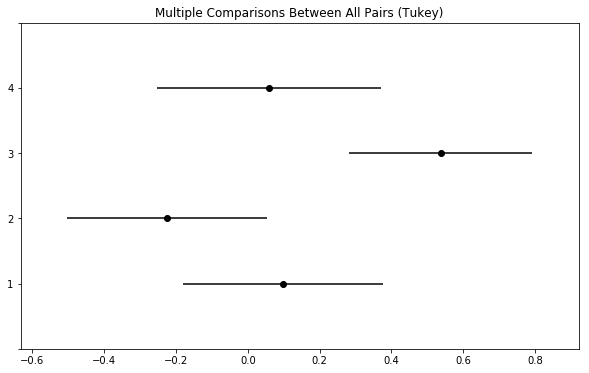

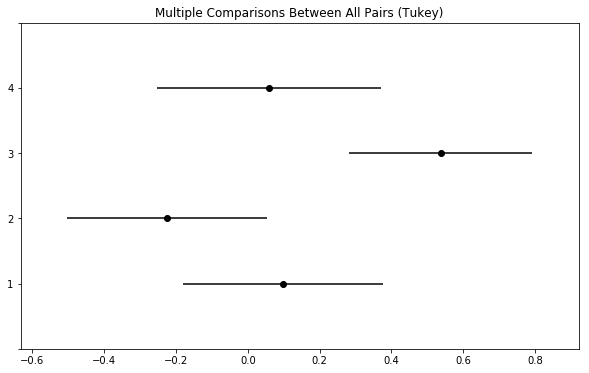

In [40]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for  that mean. If the difference in means is significant at the confidence level, the confidence intervals will not overlap. Which, pairs in the above plot have a significant difference at the 95% confidence level?

## Your turn 9
It would be useful for the manager of the auto dealership understand which days of the week have significantly different average sales at the 95% confidence level. To solve this problem do the following:
1. Compute and print the results of the Tukey HSD test using the `pairwise_tukeyhsd` function. To do so, you will need to first create a list of sales data by concatenating the sales by day of the week using the `numpy.concatenate` function, and then apply the `flatten` method. Since these values are Numpy arrays you cannot use the `+` operator for concatenation. You will also need a list of days of the week, which can be created using the normal multiplication, `*`, and concatenation, `+` operators. 
2. Use the `plot_simultneous` method on your model object to display the confidence intervals of the means. 

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
 Fri    Mon    -9063.5824 -32347.0493  14219.8844 False 
 Fri    Sat    22103.4596  -1180.0072  45386.9265 False 
 Fri    Sun    11987.3744 -11296.0924  35270.8412 False 
 Fri    Thu    7967.7283  -15315.7386  31251.1951 False 
 Fri    Tue    -6464.1509 -29747.6178  16819.3159 False 
 Fri    Wed   -14610.0965 -37893.5634  8673.3703  False 
 Mon    Sat    31167.0421  7883.5753   54450.5089  True 
 Mon    Sun    21050.9568   -2232.51   44334.4237 False 
 Mon    Thu    17031.3107  -6252.1561  40314.7775 False 
 Mon    Tue    2599.4315  -20684.0353  25882.8983 False 
 Mon    Wed    -5546.5141 -28829.9809  17736.9527 False 
 Sat    Sun   -10116.0852 -33399.5521  13167.3816 False 
 Sat    Thu   -14135.7314 -37419.1982  9147.7354  False 
 Sat    Tue   -28567.6106 -51851.0774  -5284.1438  True 
 Sat    Wed   -36713.5562  -599

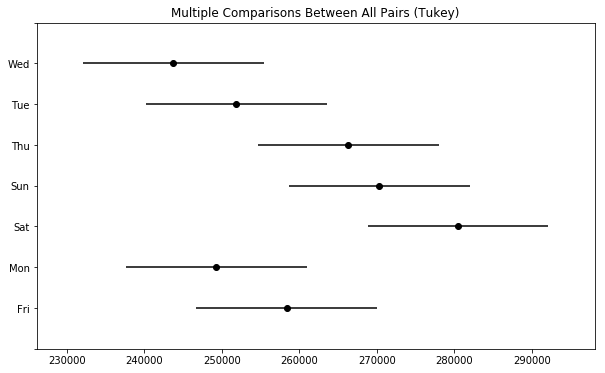

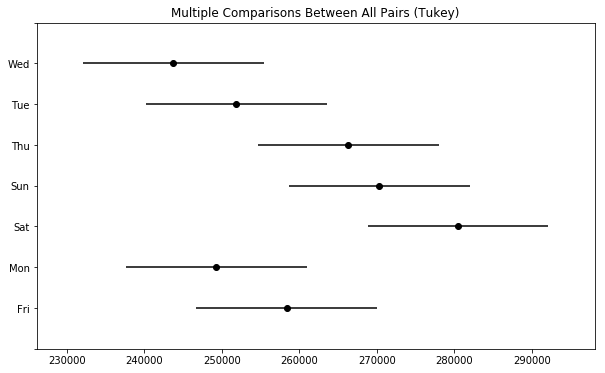

In [41]:
from operator import add
sales = np.concatenate(( Mon, Tue, Wed, Thu, Fri, Sat, Sun)).flatten()
groups = ['Mon'] * 4 + ['Tue'] * 4 + ['Wed'] * 4 + ['Thu'] * 4 + ['Fri'] * 4 + ['Sat'] * 4 + ['Sun'] * 4
Tukey_auto = pairwise_tukeyhsd(sales, groups)
print(Tukey_auto)
Tukey_auto.plot_simultaneous()

Which four pairs days of the week are statistically different at the 95% confidence level? ANS: Monday and Saturday, Tuesday and Saturday, Wednesday and Saturday, and Sunday and Wednesday. 

## Classical Tests and Big Data

With the increasing scale of data sets in the 21st Century, problems with the correct applicaton of classical tests have been amplified. The primary issue is with false positives, or **Type I errors**. This problem is known as the problem of **multiple comparisons** or **base rate fallacy**. 

To understand this problem lets look at a simple example. If we have 7 groups, there are 21 possible interactions between the groups. If we use a t-test with a significance level of 0.05, we expect there to be one false positive, even if the null hypothesis is true in all cases. 

These problems grow as the number of groups grow. As an example, consider classifing several millions objects from images. 

When there are relatively few groups with a great many cases there is no problem. The test will have ample power.

With large numbers of groups, there is a high probability of getting a false positive, or type I error, with ANOVA. Without any way to know which groups are different, it is nearly impossible to determine which group may or may not be different from the rest of the population. This is a manifestation of the base rate fallacy. 

### Bonfirroni correction  

Several adjustments to the multiple comparisons problem have been proposed. In 1979 Holm published a method know as the **Bonfirroni correction**. The adjustment is simple:

$$\alpha_b = \frac{\alpha}{m}\\
with\\ 
m =\ number\ of\ groups$$

The problem with the Bonfirroni correction is the reduction in power as the  grows smaller. For big data problems with large numbers of groups, this issue can be especially serious. 

### Confidence and credible intervals

Another approach to the base rate falacy problem is to use **confidence intervals**. For example, one can compute the confidence intervals of the distributions of differences of means between groups. We have just seen an example with Tukeys HSD method. 

Interpretation of confidence intervals is quite straight forward, especailly when compared to p-values. If the confidence intervals for the difference in means do not overlap 0 the difference in means is significant. 

The confidence intervals can be adjusted analogously to the Bonfirroni correction. This process does not have the problem with the reduction in power.   

Yet another approach is to use the Bayesian **credible interval**. While the computation is different, the intrepretation is intuitive, and analogous to interpretation of confidence intervals. 

## Summary

We have covered lot of ground in this lesson. Specifically we have discussed:

- Mean comparison tests in the form of the t-test. In this case, the null hypothesis is that there is no significant difference in means and the samples are from the same popuolation.  
- The $\chi$-squared test for count data. The null hypothesis is that there is no significant differences in the countsand the samples are from the same popuolation. 
- Distribution comparison tests in the form of the K-S test. The null hypothesis is that the two distributions are the same. 
- Variance comparison test for multiple grouped in the form of ANOVA. The null hypothesis is that there are no differences in the variances of the samples and they are all from the same population. 
- The meaning of the p-value or significance level. A p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true.
- Power of tests. The power of a test is the probability of getting a positive result when the null hypothesis is not true. 
- Multiple compairison issues with applying tests to big data problems. 

## Suplementary Material

If you need some review of the concepts of classical statistics there are numerous good books available. Two particuarly non-mathematical and readable books are shown below. These books have distinct and diferent styles. If you do not like one, you might like the other. Or, you may benefit from reading both. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/StatsDoneWrong.jpg" title="Reinhart, 2015" alt="Reinhart's book" style="float: left; height: 200px; margin-right: 10px;"/><img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/p-value.jpg" title="Vicker, 2009" alt="Vicker's book" Style="float: right; height: 200px; margin-left: 10px;" />
Alex Reinhart's book, *Statistics Done Wrong, a woefully complete guide*, No Starch Press, 2015, disscusses clasical statistical tests using numerious clever examples. 

Andrew Vicker's *What is a P-Value Anyway*, Pearson, 2009, is perhaps the most humorous statistics book ever writen; admittidly a category with little competition. The treatment is a bit broader than Reinhart's book. 




<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>